Logistic Regression Metropolis-Hastings classifier
==
## Simon Rogers, Feb 2017

In [1]:
import numpy as np
import pylab as plt
%matplotlib inline

Generate some data with two classes

In [2]:
x = np.random.randn(50,2)
x[:25,:] += 1.5
x[25:,:] += -1.5
t = np.zeros((50,1))
t[25:] += 1

Plot the data

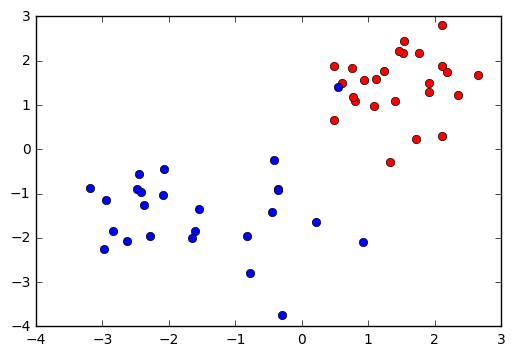

In [3]:
plt.figure()
styles = ['ro','bo']
classes = np.unique(t)
for i,classn in enumerate(classes):
    pos = np.where(t==classn)[0]
    plt.plot(x[pos,0],x[pos,1],styles[i])

Sample some decision boundaries using metropolis-hastings from this approximation and plot them

In [32]:
w_samples = []
w = np.vstack((0,0)) # initial value
jump_sigma = 0.1 # standard deviation of gaussian proposal
n_samps = 1000 # number of samples to take
sig_sq = 0.5 # prior variance
for samp in range(n_samps):
    # generate w_new
    w_new = w + np.random.randn(2,1)*jump_sigma
    # compute the prior ratio
    r = -(1.0/(2.0*sig_sq))*np.dot(w_new.T,w_new).flatten()
    r -= -(1.0/(2.0*sig_sq))*np.dot(w.T,w).flatten()
    # incorporate the likelihood part
    P_new = 1.0/(1.0+np.exp(-np.dot(x,w_new)))
    P = 1.0/(1.0+np.exp(-np.dot(x,w)))
    pos0 = np.where(t==0)[0]
    pos1 = np.where(t==1)[0]
    r += np.log(P_new[pos1]).sum() + np.log((1-P_new[pos0])).sum()
    r -= np.log(P[pos1]).sum() + np.log((1-P[pos0])).sum()
    if np.random.rand() <= np.exp(r):
        # accept
        w = w_new
    else:
        # reject
        pass
    w_samples.append(w.flatten())
w_samples = np.array(w_samps)

Plot 20 of the samples

(-5, 5)

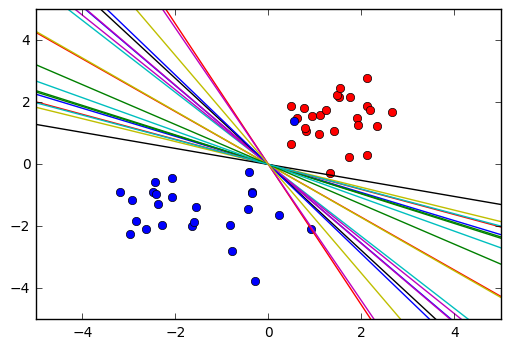

In [33]:
plt.figure()
for i,classn in enumerate(classes):
    pos = np.where(t==classn)[0]
    plt.plot(x[pos,0],x[pos,1],styles[i])

# Pick 20 random ones
for w_sample in np.random.permutation(w_samples)[:20]:
#     Plot the line corresponding to w.Tx = 0
    xv = np.array([-5,5])
    yv = (-w_sample[1]/w_sample[0])*xv
    plt.plot(xv,yv)
plt.xlim([-5,5])
plt.ylim([-5,5])
    

Plot the decision boundary. We will actually plot probability contours by making a big grid. To get these values, we have to take an expectation over the approximate posterior (the Laplacian) which we in turn approximate by sampling

In [34]:
gridX,gridY = np.meshgrid(np.arange(-5,5,0.1),np.arange(-5,5,0.1))

Note the following code is vectorised to make it faster (needs no explicit loops)

In [35]:
nr,nc = gridX.shape
gx = np.reshape(gridX,(nr*nc,1))
gy = np.reshape(gridY,(nr*nc,1))
g = np.hstack((gx,gy))
P = (1.0/(1+np.exp(np.dot(g,w_samples.T)))).mean(axis=1)
P = np.reshape(P,(nr,nc))

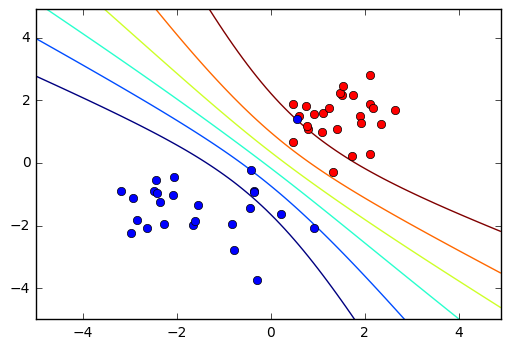

In [36]:
plt.figure()
for i,classn in enumerate(classes):
    pos = np.where(t==classn)[0]
    plt.plot(x[pos,0],x[pos,1],styles[i])
plt.contour(gridX,gridY,P)